In [2]:
import re
user = re.compile('@\w+')
text = ',@VirginAmerica What @dhepburn said.'
user.findall(text)

['@VirginAmerica', '@dhepburn']

In [5]:
text_mask = user.sub('_username_', text)

In [6]:
text_mask

',_username_ What _username_ said.'

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
text = ['The quick brown fox jumped over the lazy dog']
vectorizer = CountVectorizer()
vectorizer.fit(text)
print(vectorizer.vocabulary_)
vector = vectorizer.transform(text)
print(vector)
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	2
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [6]:
vectorizer2 = CountVectorizer()
vector2 = vectorizer2.fit_transform(text)
print(vector.shape)
print(type(vector))
print(vector.toarray())
print(vectorizer2.vocabulary_)

(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]
{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}


In [10]:
import pandas as pd
data = pd.read_csv('tweets.csv')
#data.columns = ['label', 'text', 't1', 't2', 't3']

In [11]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [9]:
import matplotlib.pyplot as plt
spam_count = data.groupby('label').count()
spam_count

,text,t1,t2,t3
label,,,,
ham,4825,45,10,6
spam,747,5,2,0


Text(0, 0.5, 'Number of Spam Texts')

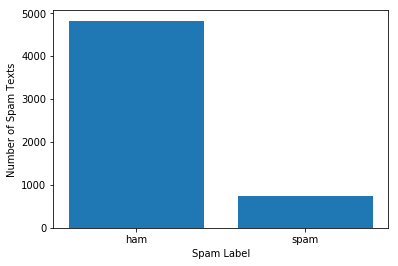

In [10]:
plt.bar(spam_count.index.values, spam_count['text'])
plt.xlabel('Spam Label')
plt.ylabel('Number of Spam Texts')

In [11]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')

In [12]:
text_table = data.text

In [13]:
text_table = text_table.apply(lambda x: ' '.join(
    term for term in x.split() if term not in set(stop_words))
)
text_table = text_table.str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b',
                                   'emailaddr')
text_table = text_table.str.replace(r'(https[s]?\S+)|(\w+\.[A-Za-z]{2,4}\s*)',
                                   'httpaddr')
text_table = text_table.str.replace(
    r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
    'phonenumbr')
text_table = text_table.str.replace(r'\d+(\.\d+)?','numbr')
text_table = text_table.str.lower()
text_table = text_table.str.replace(r'[^\w\d\s]',' ')
text_table = text_table.str.replace(r'\s+',' ')
text_table = text_table.str.replace(r'^\s+|\s+?$','')

In [14]:
porter = nltk.PorterStemmer()
data.text = text_table.apply(lambda x: ' '.join(
    porter.stem(term) for term in x.split())
)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
text1=cv.fit_transform(text_table)
text1

<5572x7758 sparse matrix of type '<class 'numpy.int64'>'
	with 44881 stored elements in Compressed Sparse Row format>

In [16]:
porter = nltk.PorterStemmer()
text_table2 = text_table.apply(lambda x: ' '.join(
    porter.stem(term) for term in x.split())
)

In [17]:
text2=cv.fit_transform(text_table2)
text2

<5572x6464 sparse matrix of type '<class 'numpy.int64'>'
	with 45140 stored elements in Compressed Sparse Row format>

In [18]:
s=' '.join(data.text)
str_list = s.lower().split()
unique_words = set(str_list)

In [19]:
dictwords = dict()
for words in unique_words:
    dictwords[words] = [str_list.count(words)]

In [20]:
dataham = data[data.label == 'ham']

In [21]:
dataspam = data[data.label == 'spam']

In [22]:
sham = ' '.join(dataham.text)
sspam = ' '.join(dataspam.text)
sham_list = sham.lower().split()
sspam_list = sspam.lower().split()

In [23]:
for words in unique_words :
    iham=sham_list.count(words)
    ispam=sspam_list.count(words)
    dictwords[words].append(iham)
    dictwords[words].append(ispam)
    dictwords[words].append(ispam-iham)
    

In [24]:
sortfreq = sorted(dictwords.items(), key=lambda x: x[1][3], reverse=True)

In [25]:
dictfreq = sortfreq[:100]
len(dictfreq)
dictfreq

[('numbr', [2458, 871, 1587, 716]),
 ('phonenumbr', [407, 1, 406, 405]),
 ('å', [300, 4, 296, 292]),
 ('free', [282, 59, 223, 164]),
 ('txt', [186, 14, 172, 158]),
 ('numbrp', [151, 1, 150, 149]),
 ('mobil', [152, 14, 138, 124]),
 ('claim', [114, 0, 114, 114]),
 ('prize', [94, 0, 94, 94]),
 ('tone', [85, 0, 85, 85]),
 ('call', [660, 289, 371, 82]),
 ('stop', [166, 45, 121, 76]),
 ('uk', [73, 1, 72, 71]),
 ('servic', [78, 5, 73, 68]),
 ('nokia', [73, 3, 70, 67]),
 ('award', [67, 1, 66, 65]),
 ('cash', [89, 13, 76, 63]),
 ('repli', [162, 50, 112, 62]),
 ('to', [107, 24, 83, 59]),
 ('text', [229, 86, 143, 57]),
 ('urgent', [69, 6, 63, 57]),
 ('guarante', [50, 0, 50, 50]),
 ('contact', [75, 14, 61, 47]),
 ('win', [78, 17, 61, 44]),
 ('cs', [44, 0, 44, 44]),
 ('min', [115, 36, 79, 43]),
 ('collect', [60, 9, 51, 42]),
 ('custom', [62, 11, 51, 40]),
 ('numbrppm', [40, 0, 40, 40]),
 ('httpaddr', [113, 38, 75, 37]),
 ('rington', [37, 0, 37, 37]),
 ('voucher', [38, 1, 37, 36]),
 ('rate', [42, 3,

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
text_counts=cv.fit_transform(data['text'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_counts, data['label'], test_size=0.1, random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(x_train, y_train)
predicted=clf.predict(x_test)
print('MultinomialNB Accuracy:',metrics.accuracy_score(y_test,predicted))

MultinomialNB Accuracy: 0.9838709677419355


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["this litlle kitty came to play when I was eating at a restarant.",
            "Merley. has the best squooshy kitten belly",
            "Google Translate app is incredible.",
            "If you open 100 tab in google you get a smiley face.",
            "Best c at photo I've ever taken.",
            "Climbing ninja cat.",
            "Impressed with google map feedback.",
            "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

#------------------------------------------------------------

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 climbing
 cat
 ninja
 eating
 impressed
 google
 feedback
 face
 extension
 ve
Cluster 1:
 google
 best
 translate
 app
 feedback
 impressed
 map
 incredible
 ve
 taken


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data["label_code"] = lb_make.fit_transform(data['label'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_counts, data['label_code'], test_size=0.1, random_state=1)

In [ ]:
from keras.models import Sequential
from keras import layers
input_dim = x_train.shape[1]
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                64650     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 64,661
Trainable params: 64,661
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train

5240    0
544     0
2653    0
1139    0
2045    0
1225    0
2527    0
4269    0
3856    0
3530    0
513     0
2684    0
906     1
3872    0
4805    0
4171    0
2037    0
1884    0
3023    0
62      0
2075    0
3725    0
1785    0
108     0
517     1
684     0
778     0
45      0
2305    0
3792    0
       ..
1031    0
1110    0
1888    0
3550    0
1527    0
753     0
3049    0
2628    0
562     0
4764    0
3562    1
252     0
2516    0
2962    0
4453    0
5374    0
5396    0
1202    0
3462    0
2797    0
4225    0
144     0
5056    0
2895    1
2763    0
905     0
5192    0
3980    0
235     0
5157    0
Name: label_code, Length: 5014, dtype: int32

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=3, verbose=1, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 4512 samples, validate on 502 samples
Epoch 1/3
4512/4512 [==============================] - 7s 1ms/step - loss: 0.4247 - acc: 0.9466 - val_loss: 0.2183 - val_acc: 0.9761
Epoch 2/3
4512/4512 [==============================] - 2s 456us/step - loss: 0.1507 - acc: 0.9829 - val_loss: 0.0995 - val_acc: 0.9861
Epoch 3/3
4512/4512 [==============================] - 2s 435us/step - loss: 0.0764 - acc: 0.9900 - val_loss: 0.0613 - val_acc: 0.9900


In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9924
Testing Accuracy: 0.9857


In [ ]:
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
model2 = Sequential()
model2.add(Embedding(len(unique_words), 50))
model2.add(Bidirectional(LSTM(32)))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x_train, y_train, batch_size=32, epochs=2, verbose=1, validation_split=0.1)

In [ ]:
loss, accuracy = model2.evaluate(x_train, y_train, verbose=False)
print('Training Accuracy: {:.4f}'.format(accuracy))
loss, accuracy = model2.evaluate(x_test, y_test, verbose=False)
print('Testing Accuracy: {:.4f}'.format(accuracy))